In [1]:
import os
from roboflow import Roboflow

# 初始化 Roboflow
rf = Roboflow(api_key="en4oYrD8E7WvJNRyT8lo") # <-- 記得換成你網頁上的 Key
project = rf.workspace("zhou-xyfir").project("plastic-bottle-2.0-dt0no")
version = project.version(1) # <-- 填入那個 3700 張的版本號

# 設定下載路徑
dataset_dir = "F:/code/bottle_dataset"

# 執行下載 (YOLOv8 格式)
dataset = version.download("yolov8", location=dataset_dir)

print(f"✅ 數據下載完成！路徑：{dataset_dir}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to F:/code/bottle_dataset in yolov8:: 100%|██████████| 14190/14190 [00:08<00:00, 1651.85it/s]


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\chou\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ 數據下載完成！路徑：F:/code/bottle_dataset


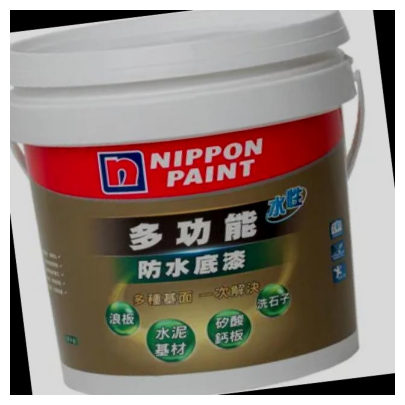

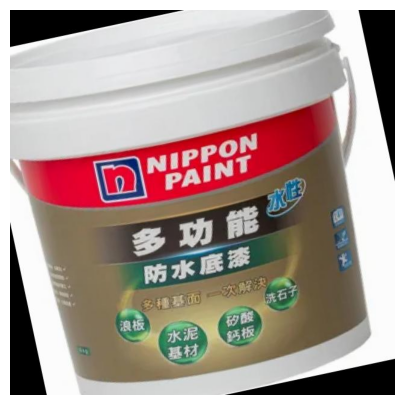

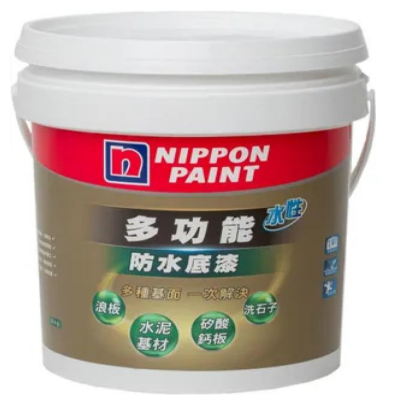

In [2]:
import cv2
import matplotlib.pyplot as plt
import glob

# 隨機抓 3 張訓練圖來看看增強後的樣子
test_images = glob.glob(f"{dataset_dir}/train/images/*.jpg")[:3]

for img_path in test_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [3]:
import os
import yaml

# 檢查 data.yaml
yaml_path = "F:/code/bottle_dataset/data.yaml"

with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

print(f"✅ 類別名稱: {data_config['names']}")
print(f"✅ 訓練集路徑: {data_config['train']}")

✅ 類別名稱: ['plastic-bottle']
✅ 訓練集路徑: ../train/images


In [5]:
import yaml

# 1. 設定你的資料夾絕對路徑
base_path = "F:/code/bottle_dataset"
yaml_path = f"{base_path}/data.yaml"

# 2. 讀取舊的設定
with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)

# 3. 強制修改路徑為絕對路徑
config['train'] = f"{base_path}/train/images"
config['val'] = f"{base_path}/valid/images"
config['test'] = f"{base_path}/test/images"  # 如果有 test 的話

# 4. 寫回檔案
with open(yaml_path, 'w') as f:
    yaml.dump(config, f)

print("✅ data.yaml 路徑已更新為絕對路徑！")

✅ data.yaml 路徑已更新為絕對路徑！


In [ ]:
from ultralytics import YOLO


# 確保這行路徑是完全正確的
final_yaml = "F:/code/bottle_dataset/data.yaml"

# 再次確認檔案真的在那裡
import os
if os.path.exists(final_yaml):
    print("✅ 檔案確認存在")

# 建議先用 cpu 測試一下路徑是否通暢，沒問題再換 device=0 (GPU)
model = YOLO('yolov8n.pt')

results = model.train(
    data=final_yaml,  # 確保這是一個字串，例如 "F:/code/bottle_dataset/data.yaml"
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,        # 如果報 CUDA 錯誤，請先改為 'cpu'
    name='bottle_exp_1'
)

✅ 檔案確認存在
Ultralytics 8.3.248  Python-3.9.25 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=F:/code/bottle_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bottle_exp_15, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

error: Caught error in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\torch\utils\data\_utils\worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\ultralytics\data\base.py", line 376, in __getitem__
    return self.transforms(self.get_image_and_label(index))
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\ultralytics\data\base.py", line 389, in get_image_and_label
    label["img"], label["ori_shape"], label["resized_shape"] = self.load_image(index)
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\ultralytics\data\base.py", line 235, in load_image
    im = imread(f, flags=self.cv2_flag)  # BGR
  File "c:\Users\chou\miniconda3\envs\bottle_detect\lib\site-packages\ultralytics\utils\patches.py", line 42, in imread
    im = cv2.imdecode(file_bytes, flags)
cv2.error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 1228800 bytes in function 'cv::OutOfMemoryError'



In [1]:
import torch
print(f"PyTorch 版本: {torch.__version__}")
print(f"CUDA 是否可用: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"顯卡名稱: {torch.cuda.get_device_name(0)}")

PyTorch 版本: 2.6.0+cu124
CUDA 是否可用: True
顯卡名稱: NVIDIA GeForce GTX 1070
